<a href="https://colab.research.google.com/github/5ohyun/Stock_SSPharm/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%9D%BC%EC%A3%BC%EC%9D%BC_%EC%98%88%EC%B8%A1_%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 전처리 작업

# 1 - (1) 데이터 병합

주식, 공매도, 배당, 금 가격, 코스피, 환율 데이터를 각 날짜 기준으로 병합(merge)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [5]:
os.chdir("/content/drive/MyDrive/팀프로젝트/삼성제약")

1. 제약 데이터

In [6]:
stock5=pd.read_csv("삼성제약 15년도.csv",encoding='UTF-8')
stock6=pd.read_csv("삼성제약 16년도.csv",encoding='UTF-8')
stock7=pd.read_csv("삼성제약 17년도.csv",encoding='UTF-8')
stock8=pd.read_csv("삼성제약 18년도.csv",encoding='UTF-8')
stock9=pd.read_csv("삼성제약 19년도.csv",encoding='UTF-8')

stock = pd.DataFrame()

for i in [stock5, stock6, stock7, stock8, stock9] : 
  i=i.sort_values(by='년/월/일',ascending=True)
  i = i.reset_index(drop=True)
  stock=pd.concat([stock,i])

stock = stock.reset_index(drop=True)
stock['년/월/일']=stock['년/월/일'].astype(str).str.replace('/',"-")


for i in ['종가', '거래량(주)', '거래대금(원)', '시가', '고가', '저가', '시가총액(백만)','상장주식수(주)'] :
  stock[i]=stock[i].str.replace(",", "").astype(float)


stock=stock[['년/월/일', '종가', '거래량(주)', '거래대금(원)', '시가', '고가', '저가', '시가총액(백만)','상장주식수(주)']]

stock=stock.rename(columns={'년/월/일':'date','종가':'c_price'})

stock

,date,c_price,거래량(주),거래대금(원),시가,고가,저가,시가총액(백만),상장주식수(주)
0,2015-01-02,2350.0,131029.0,3.064134e+08,2280.0,2400.0,2280.0,53279.0,22671867.0
1,2015-01-05,2340.0,83185.0,1.937542e+08,2370.0,2385.0,2280.0,53052.0,22671867.0
2,2015-01-06,2380.0,72097.0,1.687488e+08,2300.0,2380.0,2300.0,53959.0,22671867.0
3,2015-01-07,2395.0,81393.0,1.953211e+08,2395.0,2420.0,2375.0,54299.0,22671867.0
4,2015-01-08,2390.0,60837.0,1.452567e+08,2400.0,2415.0,2370.0,54186.0,22671867.0
...,...,...,...,...,...,...,...,...,...
1202,2019-11-25,4220.0,1908892.0,8.178295e+09,4295.0,4385.0,4210.0,248955.0,58994130.0
1203,2019-11-26,4390.0,7224166.0,3.198747e+10,4225.0,4610.0,4225.0,258984.0,58994130.0
1204,2019-11-27,4235.0,2675268.0,1.156499e+10,4395.0,4470.0,4235.0,249840.0,58994130.0
1205,2019-11-28,4240.0,3754301.0,1.634647e+10,4225.0,4570.0,4220.0,250135.0,58994130.0


2. 공매도

In [7]:
pubsale=pd.read_csv("삼성제약 공매도.csv",encoding='UTF-8')
pubsale=pubsale.rename(columns={'일자':'date','공매도거래량':'pubsale'})

pubsale['pubsale']=pubsale['pubsale'].str.replace(",", "").astype(float)
pubsale['공매도거래대금']=pubsale['공매도거래대금'].str.replace(",", "").astype(float)

pubsale = pubsale.reset_index(drop=True)

pubsale=pubsale[['date','pubsale','공매도거래대금']]

pubsale

,date,pubsale,공매도거래대금
0,2015-01-02,61.0,1.419700e+05
1,2015-01-05,723.0,1.686620e+06
2,2015-01-06,315.0,7.391900e+05
3,2015-01-07,520.0,1.245855e+06
4,2015-01-08,187.0,4.470000e+05
...,...,...,...
1202,2019-11-25,46059.0,1.974867e+08
1203,2019-11-26,255034.0,1.126076e+09
1204,2019-11-27,110546.0,4.784162e+08
1205,2019-11-28,83407.0,3.630848e+08


3. 배당

In [8]:
div5=pd.read_csv("삼성제약 배당 15년도.csv",encoding='UTF-8')
div6=pd.read_csv("삼성제약 배당 16년도.csv",encoding='UTF-8')
div7=pd.read_csv("삼성제약 배당 17년도.csv",encoding='UTF-8')
div8=pd.read_csv("삼성제약 배당 18년도.csv",encoding='UTF-8')
div9=pd.read_csv("삼성제약 배당 19년도.csv",encoding='UTF-8')

div = pd.DataFrame()

for i in [div5,div6,div7,div8,div9] : 
  i = i.sort_values(by='일자',ascending=True)
  i = i.reset_index(drop=True)
  div=pd.concat([div,i])

div = div.reset_index(drop=True)
div=div.rename(columns={'일자':'date','종가':'배당종가'})

div['date']=div['date'].astype(str).str.replace('/',"-")


for i in ['배당종가','BPS','PBR'] : 
  div[i]=div[i].astype(str).str.replace(",", "").astype(float)

div=div[['date','배당종가','BPS','PBR']]

div

,date,배당종가,BPS,PBR
0,2015-01-02,2350.0,1610.0,1.46
1,2015-01-05,2340.0,1610.0,1.45
2,2015-01-06,2380.0,1610.0,1.48
3,2015-01-07,2395.0,1610.0,1.49
4,2015-01-08,2390.0,1610.0,1.48
...,...,...,...,...
1202,2019-11-25,4220.0,2261.0,1.87
1203,2019-11-26,4390.0,2261.0,1.94
1204,2019-11-27,4235.0,2261.0,1.87
1205,2019-11-28,4240.0,2261.0,1.88


4.금 가격

In [9]:
gold=pd.read_csv("일자별 금시세.csv",encoding='UTF-8')
gold=gold.sort_values(by='년/월/일',ascending=True)
gold = gold.reset_index(drop=True)
gold=gold.rename(columns={'년/월/일':'date','원/g 종가':'gold','원/g 시가':'gold_start'})

gold['gold_start']=gold['gold_start'].str.replace(",", "").astype(float)
gold['gold']=gold['gold'].str.replace(",", "").astype(float)

gold

,date,gold,gold_start
0,2015-01-02,42300.0,42300.0
1,2015-01-05,42680.0,42400.0
2,2015-01-06,42710.0,42700.0
3,2015-01-07,42970.0,43190.0
4,2015-01-08,42890.0,43000.0
...,...,...,...
1200,2019-11-25,55150.0,55340.0
1201,2019-11-26,55110.0,54990.0
1202,2019-11-27,55220.0,55290.0
1203,2019-11-28,55210.0,55140.0


5.코스피

In [10]:
kospi=pd.read_csv("코스피지수 의약품.csv",encoding='UTF-8',header=None)
kospi=kospi.rename(columns={0:'date',1:'kospi'})
kospi=kospi.drop(0)
kospi=kospi.drop(1)
kospi = kospi.reset_index(drop=True)
#kospi['년/월/일']=kospi['년/월/일'].astype(str).str.replace('-',"/")
kospi['kospi']=kospi['kospi'].str.replace(",", "").astype(float)
kospi

,date,kospi
0,2015-01-02,4464.08
1,2015-01-05,4481.14
2,2015-01-06,4468.42
3,2015-01-07,4450.86
4,2015-01-08,4445.84
...,...,...
1202,2019-11-25,10343.65
1203,2019-11-26,10343.92
1204,2019-11-27,10485.23
1205,2019-11-28,10404.80


6. 환율 데이터

In [11]:
exrate5=pd.read_csv("환율 15년도.csv",encoding='UTF-8')
exrate6=pd.read_csv("환율 16년도.csv",encoding='UTF-8')
exrate7=pd.read_csv("환율 17년도.csv",encoding='UTF-8')
exrate8=pd.read_csv("환율 18년도.csv",encoding='UTF-8')
exrate9=pd.read_csv("환율 19년도.csv",encoding='UTF-8')

exrate = pd.DataFrame()

for i in [exrate5,exrate6,exrate7,exrate8,exrate9] : 
  i = i.sort_values(by='거래일자',ascending=True)
  i = i.reset_index(drop=True)
  exrate=pd.concat([exrate,i])

exrate = exrate.reset_index(drop=True)
exrate=exrate.rename(columns={'거래일자':'date','환율종가':'exrate'})

exrate = exrate[['date','exrate']]

for i in ['exrate'] : 
  exrate[i]=exrate[i].astype(str).str.replace(",", "").astype(float)

exrate

,date,exrate
0,2015-01-01,1093.95
1,2015-01-02,1105.65
2,2015-01-03,1107.05
3,2015-01-04,1107.05
4,2015-01-05,1109.18
...,...,...
1607,2019-11-25,1173.94
1608,2019-11-26,1176.97
1609,2019-11-27,1178.00
1610,2019-11-28,1179.12


In [44]:
a1=pd.merge(stock,exrate,on='date',how='left')
a3=pd.merge(a1,pubsale,on='date',how='left')
a4=pd.merge(a3,div,on='date',how='left')
a5=pd.merge(a4,gold,on='date',how='left')
a6=pd.merge(a5,kospi,on='date',how='left')

a6.isna().sum()

date           0
c_price        0
거래량(주)         0
거래대금(원)        0
시가             0
고가             0
저가             0
시가총액(백만)       0
상장주식수(주)       0
exrate        10
pubsale        0
공매도거래대금        0
배당종가           0
BPS            0
PBR            0
gold           2
gold_start     2
kospi          0
dtype: int64

# 1 - (2) 데이터 정제 


(1) 삼성제약 주가 기준으로 병합한 데이터 프레임 NA 처리 및 데이터 정제 "med_price.csv"

In [45]:
print(a6.index[a6['exrate'].isnull()])
print(a6.index[a6['gold'].isnull()])
print(a6.index[a6['gold_start'].isnull()])

Int64Index([198, 220, 280, 285, 305, 321, 322, 403, 431, 644], dtype='int64')
Int64Index([797, 1054], dtype='int64')
Int64Index([797, 1054], dtype='int64')


In [46]:
for i in [198, 220, 280, 285, 305, 321, 322, 403, 431, 644]:    
    a6['exrate'].iloc[i]=np.mean([a6['exrate'].iloc[i-1],a6['exrate'].iloc[i+1]])

for i in [797, 1054]:    
    a6['gold'][i]=np.mean([a6['gold'][i-1],a6['gold'][i+1]])
    a6['gold_start'][i]=np.mean([a6['gold_start'][i-1],a6['gold_start'][i+1]])


In [47]:
print(a6.index[a6['exrate'].isnull()])

a6.fillna(method='ffill',inplace=True)
print(a6.isna().sum())

Int64Index([321, 322], dtype='int64')
date          0
c_price       0
거래량(주)        0
거래대금(원)       0
시가            0
고가            0
저가            0
시가총액(백만)      0
상장주식수(주)      0
exrate        0
pubsale       0
공매도거래대금       0
배당종가          0
BPS           0
PBR           0
gold          0
gold_start    0
kospi         0
dtype: int64


In [48]:
a6.describe()

,c_price,거래량(주),거래대금(원),시가,고가,저가,시가총액(백만),상장주식수(주),exrate,pubsale,공매도거래대금,배당종가,BPS,PBR,gold,gold_start,kospi
count,1207.000000,1.207000e+03,1.207000e+03,1207.000000,1207.000000,1207.000000,1207.000000,1.207000e+03,1207.000000,1207.000000,1.207000e+03,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000,1207.000000
mean,5450.724938,1.015290e+06,6.152401e+09,5457.481359,5622.928749,5298.289147,193146.368683,4.105029e+07,1136.317914,19835.070423,9.032790e+07,5450.724938,1747.439934,3.960804,46256.222038,46279.229495,9786.833273
std,3572.304802,3.323177e+06,1.731816e+10,3578.387631,3752.769499,3406.544050,73492.602918,1.264472e+07,50.746735,56620.023078,2.076833e+08,3572.304802,437.103074,3.998475,3815.481352,3803.538048,2383.404852
min,1815.000000,2.509900e+04,9.253956e+07,1645.000000,1890.000000,1645.000000,53052.000000,2.267187e+07,1.127800,0.000000,0.000000e+00,1815.000000,1019.000000,0.800000,39900.000000,40000.000000,4445.840000
25%,3100.000000,1.582490e+05,5.319281e+08,3097.500000,3197.500000,3025.000000,151704.000000,2.868383e+07,1114.575000,1391.500000,5.611732e+06,3100.000000,1543.000000,1.490000,43935.000000,43925.000000,8059.665000
50%,3980.000000,2.827230e+05,1.361353e+09,3980.000000,4040.000000,3900.000000,171793.000000,3.971357e+07,1132.450000,6158.000000,2.800204e+07,3980.000000,2074.000000,2.140000,45580.000000,45580.000000,9574.160000
75%,6760.000000,6.960770e+05,4.146051e+09,6780.000000,6895.000000,6645.000000,210425.500000,5.823505e+07,1168.260000,16884.000000,8.871481e+07,6760.000000,2076.000000,4.430000,47375.000000,47360.000000,11424.920000
max,20900.000000,5.752795e+07,2.576227e+11,20850.000000,21900.000000,19350.000000,529525.000000,5.899413e+07,1239.280000,827486.000000,2.535291e+09,20900.000000,2261.000000,20.510000,60510.000000,60480.000000,15950.420000


No handles with labels found to put in legend.


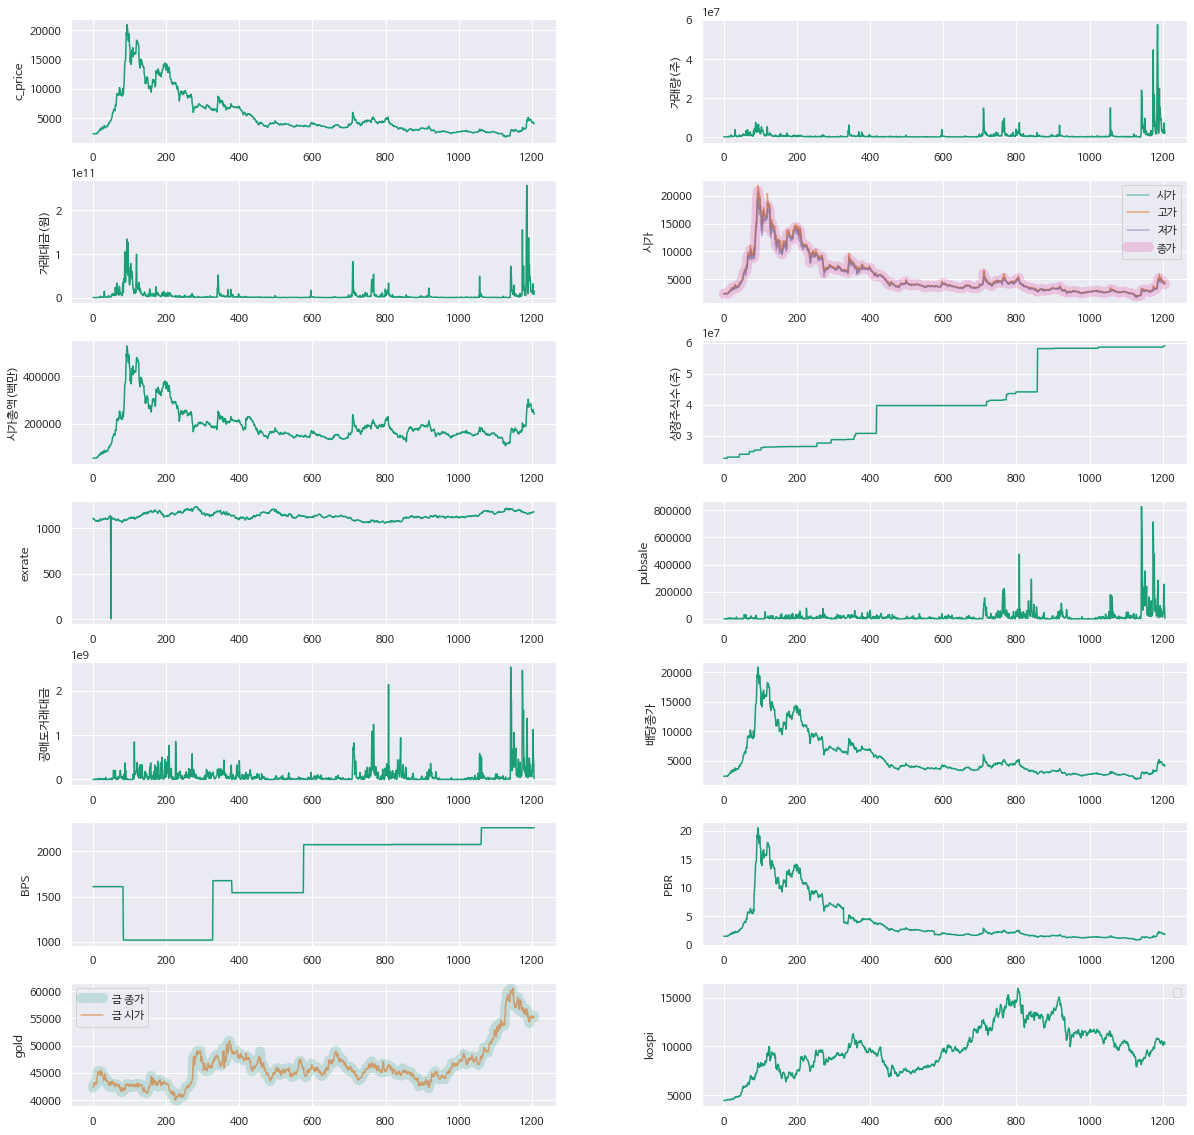

In [49]:
sns.set_palette("Dark2")

f, ax = plt.subplots(7, 2, figsize=(20, 20))

sns.lineplot(data=a6['c_price'], ax=ax[0][0])
sns.lineplot(data=a6['거래량(주)'], ax=ax[0][1])
sns.lineplot(data=a6['거래대금(원)'], ax=ax[1][0])
sns.lineplot(data=a6['시가'], ax=ax[1][1],label="시가",alpha = 0.5)
sns.lineplot(data=a6['고가'], ax=ax[1][1],label="고가",alpha = 0.5)
sns.lineplot(data=a6['저가'], ax=ax[1][1],label="저가",alpha = 0.5)
sns.lineplot(data=a6['c_price'],ax=ax[1][1],label="종가",linewidth=10,alpha = 0.2)
sns.lineplot(data=a6['시가총액(백만)'], ax=ax[2][0])
sns.lineplot(data=a6['상장주식수(주)'], ax=ax[2][1])
sns.lineplot(data=a6['exrate'], ax=ax[3][0])
sns.lineplot(data=a6['pubsale'], ax=ax[3][1])
sns.lineplot(data=a6['공매도거래대금'], ax=ax[4][0])
sns.lineplot(data=a6['배당종가'], ax=ax[4][1])
sns.lineplot(data=a6['BPS'], ax=ax[5][0])
sns.lineplot(data=a6['PBR'], ax=ax[5][1])
sns.lineplot(data=a6['gold'], ax=ax[6][0],label="금 종가",alpha = 0.2,linewidth=10)
sns.lineplot(data=a6['gold_start'], ax=ax[6][0],label="금 시가",alpha = 0.5)
sns.lineplot(data=a6['kospi'], ax=ax[6][1])

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.legend()
plt.show()


# plt.plot( 'x_values', 'y1_values', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
# plt.plot( 'x_values', 'y2_values', data=df, marker='', color='olive', linewidth=2)
# plt.plot( 'x_values', 'y3_values', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
# # show legend
# plt.legend()

In [50]:
a6.iloc[49]

date           2015-03-17
c_price              4600
거래량(주)             376404
거래대금(원)       1.72252e+09
시가                   4650
고가                   4660
저가                   4490
시가총액(백만)           110274
상장주식수(주)      2.39727e+07
exrate             1.1278
pubsale              1176
공매도거래대금       5.41136e+06
배당종가                 4600
BPS                  1610
PBR                  2.86
gold                42700
gold_start          43100
kospi             5333.94
Name: 49, dtype: object

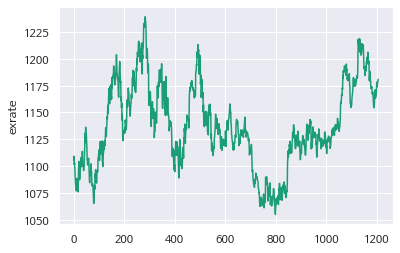

In [51]:
a6['exrate'][49] = 1127.8 #1.1278

sns.lineplot(data=a6['exrate'])

(2) 시간 변수로 요일 변수, 월 변수, 분기별 변수 원 핫 인코딩으로 생성  "med_data.csv"

In [ ]:

a6=pd.read_csv("C:\\Users\\leeso\\Desktop\\2019-2\\빅데이터\\가공data\\med_price.csv", encoding='euc-kr')#,index=False)


import datetime
def dow(date):
    conver_date=datetime.datetime.strptime(date,"%Y-%m-%d").date()

    
    days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    dayNumber=conver_date.weekday()
    return days[dayNumber]


a6['date'].iloc[2][5:7]
a6['yoil']=a6['date'].map(dow)
a6['month']=a6['date'].map(lambda x : int(x[5:7]))
a6['first']=(a6['month']==1)+(a6['month']==2)+(a6['month']==3)
a6['second']=(a6['month']==4)+(a6['month']==5)+(a6['month']==6)
a6['third']=(a6['month']==7)+(a6['month']==8)+(a6['month']==9)
a6['fourth']=(a6['month']==10)+(a6['month']==11)+(a6['month']==12)


dummy1=pd.get_dummies(a6['yoil'], drop_first=True)
dummy2=pd.get_dummies(a6['month'], prefix='month', drop_first=True)
dummy3=pd.get_dummies(a6['first'], prefix='first', drop_first=True)
dummy4=pd.get_dummies(a6['second'], prefix='second', drop_first=True)
dummy5=pd.get_dummies(a6['third'], prefix='third', drop_first=True)
dummy6=pd.get_dummies(a6['fourth'], prefix='fourth', drop_first=True)

a6=pd.concat([a6,dummy1,dummy2,dummy3,dummy4,dummy5,dummy6],axis=1)

a6=a6.drop(['yoil','month','first','second','third','fourth'],axis=1)

len(a6.columns)
a6.columns


a6.isnull().sum()
a6.dtypes

a6.to_csv("C:\\Users\\leeso\\Desktop\\2019-2\\빅데이터\\가공data\\med_data.csv",encoding='UTF-8',index=False)


#correlation 상관계수 

corr_matrix=a6.corr()
corr_matrix['c_price'].sort_values(ascending=False)

C:\Users\leeso\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\leeso\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\leeso\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\leeso\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, us

c_price        1.000000
PBR            0.983749
month_6        0.125663
second_True    0.123832
month_5        0.078827
exrate         0.073680
month_7        0.058501
third_True     0.030964
month_10       0.019442
month_9        0.015337
Wednesday      0.008483
Thursday       0.004429
Tuesday        0.002066
month_11      -0.003632
fourth_True   -0.003868
Monday        -0.006077
month_4       -0.009477
month_12      -0.023898
month_8       -0.026091
month_3       -0.075770
month_2       -0.081007
pubsale       -0.091643
first_True    -0.151768
kospi         -0.324537
gold          -0.434534
BPS           -0.796905
Name: c_price, dtype: float64

# 2. 변수 예측

(1) 예측할 날짜의 데이터를 -1로 채워넣고 생성하며 시간 변수 만들기

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Dec  1 22:20:30 2019

@author: leeso
"""

# 변수 예측

import numpy as np
import pandas as pd
import os

os.chdir("C:\\Users\\leeso\\Desktop\\2019-2\\빅데이터\\가공data")
med_pred=pd.read_csv("med_price.csv",encoding='euc-kr')
med_pred.isnull().sum()
c=[]
date_list=[]
exrate_list=[]
pubsale_list=[]
c_price_list=[]
bps_list=[]
pbr_list=[]
gold_list=[]
kospi_list=[]


for k in range(12):
    i=-1
    c.append(i)
    
d=['2019-12-02','2019-12-03','2019-12-04','2019-12-05',
   '2019-12-06','2019-12-07','2019-12-08','2019-12-09','2019-12-10',
   '2019-12-11','2019-12-12','2019-12-13']

med_pred.columns

d = pd.DataFrame(data={'date':d,'c_price':c, 'exrate':c, 'pubsale':c, 'BPS':c,'PBR':c,'gold':c,'kospi':c})

med_pred=pd.concat([med_pred,d])
med_pred = med_pred.reset_index()
med_pred = med_pred.drop('index',axis=1) # -1로 채운 값

###########################################################

import datetime
def dow(date):
    conver_date=datetime.datetime.strptime(date,"%Y-%m-%d").date()

    
    days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    dayNumber=conver_date.weekday()
    return days[dayNumber]


med_pred['yoil']=med_pred['date'].map(dow)
med_pred.head()

nd15=med_pred.loc[med_pred['date']<'2016-01-01',]

nd16=med_pred.loc[med_pred['date']>='2016-01-01',]
nd16=nd16.loc[nd16['date']<'2017-01-01']

nd17=med_pred.loc[med_pred['date']>='2017-01-01',]
nd17=nd17.loc[nd17['date']<'2018-01-01']

nd18=med_pred.loc[med_pred['date']>='2018-01-01',]
nd18=nd18.loc[nd18['date']<'2019-01-01']

nd19=med_pred.loc[med_pred['date']>='2019-01-01',]
nd19=nd19.loc[nd19['date']<'2020-01-01']


l15=nd15['date'].map(lambda x : datetime.date(int(x[:4]), int(x[5:7]), int(x[8:10])).isocalendar()[1])
l16=nd16['date'].map(lambda x : datetime.date(int(x[:4]), int(x[5:7]), int(x[8:10])).isocalendar()[1])+52
l17=nd17['date'].map(lambda x : datetime.date(int(x[:4]), int(x[5:7]), int(x[8:10])).isocalendar()[1])+52*2
l18=nd18['date'].map(lambda x : datetime.date(int(x[:4]), int(x[5:7]), int(x[8:10])).isocalendar()[1])+52*3
l19=nd19['date'].map(lambda x : datetime.date(int(x[:4]), int(x[5:7]), int(x[8:10])).isocalendar()[1])+52*4

l0=l15.append(l16)
l1=l0.append(l17)
l2=l1.append(l18)
l3=l2.append(l19)
#l5=l4.append(l1)

l3

med_pred['week_num']=l3
med_pred.head(20)

med_pred.columns

# 요일, 월, 분기별 변수 추가

med_pred['date'].iloc[2][5:7] #월
med_pred['yoil']=med_pred['date'].map(dow)
med_pred['month']=med_pred['date'].map(lambda x : int(x[5:7]))
med_pred['first']=(med_pred['month']==1)+(med_pred['month']==2)+(med_pred['month']==3)
med_pred['second']=(med_pred['month']==4)+(med_pred['month']==5)+(med_pred['month']==6)
med_pred['third']=(med_pred['month']==7)+(med_pred['month']==8)+(med_pred['month']==9)
med_pred['fourth']=(med_pred['month']==10)+(med_pred['month']==11)+(med_pred['month']==12)

dummy1=pd.get_dummies(med_pred['yoil'], drop_first=True)
dummy2=pd.get_dummies(med_pred['month'], prefix='month', drop_first=True)
dummy3=pd.get_dummies(med_pred['first'], prefix='first', drop_first=True)
dummy4=pd.get_dummies(med_pred['second'], prefix='second', drop_first=True)
dummy5=pd.get_dummies(med_pred['third'], prefix='third', drop_first=True)
dummy6=pd.get_dummies(med_pred['fourth'], prefix='fourth', drop_first=True)

med_pred=pd.concat([med_pred,dummy1,dummy2,dummy3,dummy4,dummy5,dummy6],axis=1)

med_pred=med_pred.drop(['yoil','month','first','second','third','fourth'],axis=1)

len(med_pred.columns)
med_pred.columns


med_pred.isnull().sum()

C:\Users\leeso\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\leeso\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\leeso\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\leeso\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, us

date           0
c_price        0
exrate         0
pubsale        0
BPS            0
PBR            0
gold           0
kospi          0
week_num       0
Monday         0
Saturday       0
Sunday         0
Thursday       0
Tuesday        0
Wednesday      0
month_2        0
month_3        0
month_4        0
month_5        0
month_6        0
month_7        0
month_8        0
month_9        0
month_10       0
month_11       0
month_12       0
first_True     0
second_True    0
third_True     0
fourth_True    0
dtype: int64

(2) 각 변수 예측에 필요한 변수만 선택

In [ ]:
p_exrate=med_pred[['date','exrate','week_num', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'first_True', 'second_True', 'third_True', 'fourth_True']]

p_exrate.isnull().sum()

p_pubsale=med_pred[['date','pubsale','week_num', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'first_True', 'second_True', 'third_True', 'fourth_True']]

p_pubsale.isnull().sum()
#p_pubsale.fillna(method='ffill',inplace=True)

p_BPS=med_pred[['date','BPS','week_num', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'first_True', 'second_True', 'third_True', 'fourth_True']]
p_BPS.isnull().sum()

p_PBR=med_pred[['date','PBR','week_num', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'first_True', 'second_True', 'third_True', 'fourth_True']]
p_PBR.isnull().sum()

p_gold=med_pred[['date','gold','week_num', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'first_True', 'second_True', 'third_True', 'fourth_True']]
p_gold.isnull().sum()
p_gold.fillna(method='ffill',inplace=True)

p_kospi=med_pred[['date','kospi','week_num', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'first_True', 'second_True', 'third_True', 'fourth_True']]
p_kospi.isnull().sum()

pc_price=med_pred[['date','c_price','week_num', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'first_True', 'second_True', 'third_True', 'fourth_True']]

C:\Users\leeso\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


(3) Validation으로 정한 각 변수들의 예측 모델 사용하여 예측 "pred_only.csv"

In [ ]:
i=10
for i in range(0,10,1): 
    datename1=str(pd.to_datetime('2019-09-30')+pd.DateOffset(days=7*i))[:10]
    datename2=str(pd.to_datetime('2019-09-30')+pd.DateOffset(days=7*(i+1)))[:10]
    

    
    from sklearn.ensemble import RandomForestRegressor
    
    #환율data
    
    train=p_exrate.loc[p_exrate['date']<datename1,]
    test=p_exrate.loc[p_exrate['date']>=datename1,]
    test=test.loc[test['date']<datename2,]
    
    y_train=train['exrate']
    X_train=train.drop(['exrate','date'],axis=1)
    y_train.isnull().sum()
    
    y_test=test['exrate']
    X_test=test.drop(['exrate','date'],axis=1)
    
    pppp=len(X_test.columns)
    rf=RandomForestRegressor(n_estimators=1000,n_jobs=3,max_features=pppp)
    rf.fit(X_train,y_train)
    
    pred_1=rf.predict(X_test)
    
    
    
    
    #공매도
    
    train=p_pubsale.loc[p_pubsale['date']<datename1,]
    test=p_pubsale.loc[p_pubsale['date']>=datename1,]
    test=test.loc[test['date']<datename2,]
    
    y_train=train['pubsale']
    X_train=train.drop(['pubsale','date'],axis=1)
    y_train.isnull().sum()
    
    y_test=test['pubsale']
    X_test=test.drop(['pubsale','date'],axis=1)
    
    len(X_test.columns)
    from sklearn.linear_model import LinearRegression
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)
    pred_2=lin_reg.predict(X_test)

    
    
    
    #gold
    train=p_gold.loc[p_gold['date']<datename1,]
    test=p_gold.loc[p_gold['date']>=datename1,]
    test=test.loc[test['date']<datename2,]
    
    y_train=train['gold']
    X_train=train.drop(['gold','date'],axis=1)
    y_train.isnull().sum()
    
    y_test=test['gold']
    X_test=test.drop(['gold','date'],axis=1)
    
    len(X_test.columns)
    rf=RandomForestRegressor(n_estimators=1000,n_jobs=3)
    rf.fit(X_train,y_train)
    
    pred_3=rf.predict(X_test)
    
    #kospi
    train=p_kospi.loc[p_kospi['date']<datename1,]
    test=p_kospi.loc[p_kospi['date']>=datename1,]
    test=test.loc[test['date']<datename2,]
    
    y_train=train['kospi']
    X_train=train.drop(['kospi','date'],axis=1)
    y_train.isnull().sum()
    
    y_test=test['kospi']
    X_test=test.drop(['kospi','date'],axis=1)
    
    pppp=len(X_test.columns)
    rf=RandomForestRegressor(n_estimators=1000,n_jobs=3,max_features=pppp)
    rf.fit(X_train,y_train)
    
    pred_4=rf.predict(X_test)

    #BPS
    train=p_BPS.loc[p_BPS['date']<datename1,]
    test=p_BPS.loc[p_BPS['date']>=datename1,]
    test=test.loc[test['date']<datename2,]
    
    y_train=train['BPS']
    X_train=train.drop(['BPS','date'],axis=1)
    y_train.isnull().sum()
    
    y_test=test['BPS']
    X_test=test.drop(['BPS','date'],axis=1)
    
    pppp=len(X_test.columns)
    rf=RandomForestRegressor(n_estimators=1000,n_jobs=3,max_features=pppp)
    rf.fit(X_train,y_train)
    
    pred_5=rf.predict(X_test)
    
    #PBR
    train=p_PBR.loc[p_PBR['date']<datename1,]
    test=p_PBR.loc[p_PBR['date']>=datename1,]
    test=test.loc[test['date']<datename2,]
    
    y_train=train['PBR']
    X_train=train.drop(['PBR','date'],axis=1)
    y_train.isnull().sum()
    
    y_test=test['PBR']
    X_test=test.drop(['PBR','date'],axis=1)
    
    len(X_test.columns)
    rf=RandomForestRegressor(n_estimators=1000,n_jobs=3)
    rf.fit(X_train,y_train)
    
    pred_6=rf.predict(X_test)
    
    
    #c_price
    train=pc_price.loc[pc_price['date']<datename1,]
    test=pc_price.loc[pc_price['date']>=datename1,]
    test=test.loc[test['date']<datename2,]
    
    y_train=train['c_price']
    X_train=train.drop(['c_price','date'],axis=1)
    y_train.isnull().sum()
    
    y_test=test['c_price']
    X_test=test.drop(['c_price','date'],axis=1)
    
    len(X_test.columns)
    rf=RandomForestRegressor(n_estimators=1000,n_jobs=3)
    rf.fit(X_train,y_train)
    
    pred_7=rf.predict(X_test)
    
    
    #############
    
    test2=med_pred.loc[med_pred['date']>=datename1,]
    test2=test.loc[test['date']<datename2,]
    pred_d=list(test2['date'])
    


    date_list=date_list+pred_d
    exrate_list=exrate_list+list(pred_1)
    pubsale_list=pubsale_list+list(pred_2)
    gold_list=gold_list+list(pred_3)
    kospi_list=kospi_list+list(pred_4)
    bps_list=bps_list+list(pred_5)
    pbr_list=pbr_list+list(pred_6)
    c_price_list=c_price_list+list(pred_7)


    

df_total2=pd.DataFrame({'date':date_list,'c_price':c_price_list,'exrate':exrate_list,'pubsale':pubsale_list,'BPS':bps_list,'PBR':pbr_list,'gold':gold_list,'kospi':kospi_list})#,'wind':windspeed_list,'rain':rain_list})


#df_total2.to_csv('pred_only.csv',index=False)

# 3. 삼성제약 종가 예측

(1) 변수들의 예측값 사용하여 validation으로 얻은 모델을 사용해 12월 2일부터 12월 6일까지 종가 예측

In [ ]:

import numpy as np
import pandas as pd
import os

os.chdir("C:\\Users\\leeso\\Desktop\\2019-2\\빅데이터\\가공data")
med_pred=pd.read_csv("med_price.csv",encoding='euc-kr')
pred=pd.read_csv("pred_only.csv",encoding='euc-kr')


#############최종 
#med_pred.fillna(method='ffill',inplace=True)

pred1=pred.iloc[43:48]
pred1.reset_index(drop=True)

med=pd.concat([med_pred,pred1])
med.reset_index(drop=True)



import datetime
def dow(date):
    conver_date=datetime.datetime.strptime(date,"%Y-%m-%d").date()

    
    days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    dayNumber=conver_date.weekday()
    return days[dayNumber]

med['date'].iloc[2][5:7] #월
med['yoil']=med['date'].map(dow)
med['month']=med['date'].map(lambda x : int(x[5:7]))
med['first']=(med['month']==1)+(med['month']==2)+(med['month']==3)
med['second']=(med['month']==4)+(med['month']==5)+(med['month']==6)
med['third']=(med['month']==7)+(med['month']==8)+(med['month']==9)
med['fourth']=(med['month']==10)+(med['month']==11)+(med['month']==12)


dummy1=pd.get_dummies(med['yoil'], drop_first=True)
dummy2=pd.get_dummies(med['month'], prefix='month', drop_first=True)
dummy3=pd.get_dummies(med['first'], prefix='first', drop_first=True)
dummy4=pd.get_dummies(med['second'], prefix='second', drop_first=True)
dummy5=pd.get_dummies(med['third'], prefix='third', drop_first=True)
dummy6=pd.get_dummies(med['fourth'], prefix='fourth', drop_first=True)

med=pd.concat([med,dummy1,dummy2,dummy3,dummy4,dummy5,dummy6],axis=1)

med=med.drop(['yoil','month','first','second','third','fourth'],axis=1)

len(med.columns)
med.columns
med_pred.columns




train=med.loc[med['date']<='2019-11-29',]
test=med.loc[med['date']>='2019-12-02',]
test=test.loc[test['date']<='2019-12-06',]


train.isnull().sum()
#train.fillna(method='ffill',inplace=True)

y_train=train['c_price']
X_train=train.drop(['c_price','date'],axis=1)

y_test=test['c_price']
X_test=test.drop(['c_price','date'],axis=1)



#bagging
from sklearn.ensemble import RandomForestRegressor
pppp=len(X_train.columns)
rf=RandomForestRegressor(n_estimators=1000,n_jobs=3,max_features=pppp)
rf_fit= rf.fit(X_train,y_train)
price_pred3=rf_fit.predict(X_test)  
price_pred3


price_pred3 #배깅



C:\Users\leeso\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\leeso\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\leeso\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
C:\Users\leeso\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, us

array([4041.95 , 4085.98 , 4042.62 , 4068.05 , 3956.915])

# +++ Validation

# 1. 변수 예측 Validation

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Dec  1 22:20:30 2019

@author: leeso
"""

import numpy as np
import pandas as pd
import os

os.chdir("C:\\Users\\leeso\\Desktop\\2019-2\\빅데이터\\가공data")
med_pred=pd.read_csv("med_data.csv",encoding='euc-kr')
med_pred.isnull().sum()

med_pred.columns


###########################################################

import datetime
def dow(date):
    conver_date=datetime.datetime.strptime(date,"%Y-%m-%d").date()

    
    days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    dayNumber=conver_date.weekday()
    return days[dayNumber]


nd15=med_pred.loc[med_pred['date']<'2016-01-01',]

nd16=med_pred.loc[med_pred['date']>='2016-01-01',]
nd16=nd16.loc[nd16['date']<'2017-01-01']

nd17=med_pred.loc[med_pred['date']>='2017-01-01',]
nd17=nd17.loc[nd17['date']<'2018-01-01']

nd18=med_pred.loc[med_pred['date']>='2018-01-01',]
nd18=nd18.loc[nd18['date']<'2019-01-01']

nd19=med_pred.loc[med_pred['date']>='2019-01-01',]
nd19=nd19.loc[nd19['date']<'2020-01-01']


l15=nd15['date'].map(lambda x : datetime.date(int(x[:4]), int(x[5:7]), int(x[8:10])).isocalendar()[1])
l16=nd16['date'].map(lambda x : datetime.date(int(x[:4]), int(x[5:7]), int(x[8:10])).isocalendar()[1])+52
l17=nd17['date'].map(lambda x : datetime.date(int(x[:4]), int(x[5:7]), int(x[8:10])).isocalendar()[1])+52*2
l18=nd18['date'].map(lambda x : datetime.date(int(x[:4]), int(x[5:7]), int(x[8:10])).isocalendar()[1])+52*3
l19=nd19['date'].map(lambda x : datetime.date(int(x[:4]), int(x[5:7]), int(x[8:10])).isocalendar()[1])+52*4

l0=l15.append(l16)
l1=l0.append(l17)
l2=l1.append(l18)
l3=l2.append(l19)
#l5=l4.append(l1)



med_pred['week_num']=l3
med_pred.head(20)

med_pred.columns

# 요일, 월, 분기별 변수 추가


p_exrate=med_pred[['date','exrate','week_num', 'Monday','Thursday', 'Tuesday',
       'Wednesday', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'first_True', 'second_True', 'third_True', 'fourth_True']]

p_exrate.isnull().sum()

p_pubsale=med_pred[['date','pubsale','week_num', 'Monday',  'Thursday', 'Tuesday',
       'Wednesday', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'first_True', 'second_True', 'third_True', 'fourth_True']]

p_pubsale.isnull().sum()
#p_pubsale.fillna(method='ffill',inplace=True)

p_BPS=med_pred[['date','BPS','week_num', 'Monday',  'Thursday', 'Tuesday',
       'Wednesday', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'first_True', 'second_True', 'third_True', 'fourth_True']]
p_BPS.isnull().sum()

p_PBR=med_pred[['date','PBR','week_num', 'Monday', 'Thursday', 'Tuesday',
       'Wednesday', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'first_True', 'second_True', 'third_True', 'fourth_True']]
p_PBR.isnull().sum()

p_gold=med_pred[['date','gold','week_num', 'Monday',  'Thursday', 'Tuesday',
       'Wednesday', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'first_True', 'second_True', 'third_True', 'fourth_True']]
p_gold.isnull().sum()
p_gold.fillna(method='ffill',inplace=True)

p_kospi=med_pred[['date','kospi','week_num', 'Monday', 'Thursday', 'Tuesday',
       'Wednesday', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'first_True', 'second_True', 'third_True', 'fourth_True']]
p_kospi.isnull().sum()

pc_price=med_pred[['date','c_price','week_num', 'Monday',  'Thursday', 'Tuesday',
       'Wednesday', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'first_True', 'second_True', 'third_True', 'fourth_True']]

1. 환율 Validation

In [ ]:

    #modeling1 (배깅)
total_list=[]
j=25
for j in range(0,26,1):

    datename1=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*j))[:10]
    datename2=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*(j+1)))[:10]

    train=p_exrate.loc[p_exrate['date']<datename1,]
    test=p_exrate.loc[p_exrate['date']>=datename1,]
    test=test.loc[test['date']<datename2,]
    
    from sklearn.ensemble import RandomForestRegressor
    
    y_train=train['exrate']
    X_train=train.drop(['exrate','date'],axis=1)
    X_train.columns
    
    y_test=test['exrate']
    X_test=test.drop(['exrate','date'],axis=1)
    
    pppp=len(X_train.columns)
    rf=RandomForestRegressor(n_estimators=1000,n_jobs=3,max_features=pppp)
    rf.fit(X_train,y_train)
        
    pred=rf.predict(X_test)
    
    real=test['exrate']
    
    from sklearn.metrics import mean_squared_error
    mse9 = mean_squared_error(pred,real) #MAE
    rmse09=np.sqrt(mse9)
    total_list.append(rmse09)

VALUE1=pd.Series(total_list).mean()


    #modeling2 (randomforest)
total_list=[]
for j in range(0,26,1):

    datename1=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*j))[:10]
    datename2=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*(j+1)))[:10]

    train=p_exrate.loc[p_exrate['date']<datename1,]
    test=p_exrate.loc[p_exrate['date']>=datename1,]
    test=test.loc[test['date']<datename2,]
        
    from sklearn.ensemble import RandomForestRegressor
    
    y_train=train['exrate']
    X_train=train.drop(['exrate','date'],axis=1)
    X_train.columns
    
    y_test=test['exrate']
    X_test=test.drop(['exrate','date'],axis=1)
    
    #pppp=len(X_train.columns)
    rf=RandomForestRegressor(n_estimators=1000,n_jobs=3)#,max_features=pppp)
    rf.fit(X_train,y_train)
        
    pred=rf.predict(X_test)
    
    real=test['exrate']
    
    from sklearn.metrics import mean_squared_error
    mse9 = mean_squared_error(pred,real) #MAE
    rmse09=np.sqrt(mse9)
    total_list.append(rmse09)

VALUE2=pd.Series(total_list).mean()

#modeling3 linear regression)

total_list=[]
for j in range(0,26,1):

    datename1=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*j))[:10]
    datename2=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*(j+1)))[:10]

    train=p_exrate.loc[p_exrate['date']<datename1,]
    test=p_exrate.loc[p_exrate['date']>=datename1,]
    test=test.loc[test['date']<datename2,]


    from sklearn.ensemble import RandomForestRegressor
    
    y_train=train['exrate']
    X_train=train.drop(['exrate','date'],axis=1)
    X_train.columns
    
    y_test=test['exrate']
    X_test=test.drop(['exrate','date'],axis=1)
    
    from sklearn.linear_model import LinearRegression
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)
    pred=lin_reg.predict(X_test)
    
    real=test['exrate']

    
    from sklearn.metrics import mean_squared_error
    mse9 = mean_squared_error(pred,real) #MAE
    rmse09=np.sqrt(mse9)
    total_list.append(rmse09)

VALUE3=pd.Series(total_list).mean()

print(VALUE1) #배깅
print(VALUE2) #randomforest
print(VALUE3) #linear
    

8.873569015078457
8.836761370192232
53.072814238376445


2. 공매도 Validation

In [ ]:

    
        #modeling1 (배깅)
total_list=[]
j=25
for j in range(0,26,1):

    datename1=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*j))[:10]
    datename2=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*(j+1)))[:10]

    train=p_pubsale.loc[p_pubsale['date']<datename1,]
    test=p_pubsale.loc[p_pubsale['date']>=datename1,]
    test=test.loc[test['date']<datename2,]
    
    
    from sklearn.ensemble import RandomForestRegressor
    
    y_train=train['pubsale']
    X_train=train.drop(['pubsale','date'],axis=1)
    X_train.columns
    
    y_test=test['pubsale']
    X_test=test.drop(['pubsale','date'],axis=1)
    
    pppp=len(X_train.columns)
    rf=RandomForestRegressor(n_estimators=1000,n_jobs=3,max_features=pppp)
    rf.fit(X_train,y_train)
        
    pred=rf.predict(X_test)
    
    real=test['pubsale']
    
    from sklearn.metrics import mean_squared_error
    mse9 = mean_squared_error(pred,real) #MAE
    rmse09=np.sqrt(mse9)
    total_list.append(rmse09)

VALUE1=pd.Series(total_list).mean()


    #modeling2 (randomforest)
total_list=[]
for j in range(0,26,1):

    datename1=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*j))[:10]
    datename2=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*(j+1)))[:10]

    train=p_pubsale.loc[p_pubsale['date']<datename1,]
    test=p_pubsale.loc[p_pubsale['date']>=datename1,]
    test=test.loc[test['date']<datename2,]
        
    from sklearn.ensemble import RandomForestRegressor
    
    y_train=train['pubsale']
    X_train=train.drop(['pubsale','date'],axis=1)
    X_train.columns
    
    y_test=test['pubsale']
    X_test=test.drop(['pubsale','date'],axis=1)
    
    #pppp=len(X_train.columns)
    rf=RandomForestRegressor(n_estimators=1000,n_jobs=3)#,max_features=pppp)
    rf.fit(X_train,y_train)
        
    pred=rf.predict(X_test)
    
    real=test['pubsale']
    
    from sklearn.metrics import mean_squared_error
    mse9 = mean_squared_error(pred,real) #MAE
    rmse09=np.sqrt(mse9)
    total_list.append(rmse09)

VALUE2=pd.Series(total_list).mean()

#modeling3 linear regression)

total_list=[]

for j in range(0,26,1):

    datename1=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*j))[:10]
    datename2=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*(j+1)))[:10]

    train=p_pubsale.loc[p_pubsale['date']<datename1,]
    test=p_pubsale.loc[p_pubsale['date']>=datename1,]
    test=test.loc[test['date']<datename2,]

    
    y_train=train['pubsale']
    X_train=train.drop(['pubsale','date'],axis=1)
    X_train.columns
    
    y_test=test['pubsale']
    X_test=test.drop(['pubsale','date'],axis=1)
    
    from sklearn.linear_model import LinearRegression
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)
    lin_reg.coef_
    pred=lin_reg.predict(X_test)
    
    rsqu_train.append(lin_reg.score(X_train,y_train))
    rsqu_test.append(lin_reg.score(X_test,y_test))
    
    real=test['pubsale']
    
    from sklearn.metrics import mean_squared_error
    mse9 = mean_squared_error(pred,real) #MAE
    rmse09=np.sqrt(mse9)
    total_list.append(rmse09)

VALUE3=pd.Series(total_list).mean()



print(VALUE1) #배깅
print(VALUE2) #randomforest
print(VALUE3) #linear

108350.31083512734
107758.28545850786
85851.50564915653


3. 금 가격 Validation

In [ ]:
#gold
#modeling1 (배깅)
        
total_list=[]
j=25
for j in range(0,26,1):
    datename1=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*j))[:10]
    datename2=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*(j+1)))[:10]

    train=p_gold.loc[p_gold['date']<datename1,]
    test=p_gold.loc[p_gold['date']>=datename1,]
    test=test.loc[test['date']<datename2,]
    
    from sklearn.ensemble import RandomForestRegressor
    
    y_train=train['gold']
    X_train=train.drop(['gold','date'],axis=1)
    X_train.columns
    
    y_test=test['gold']
    X_test=test.drop(['gold','date'],axis=1)
    
    pppp=len(X_train.columns)
    rf=RandomForestRegressor(n_estimators=1000,n_jobs=3,max_features=pppp)
    rf.fit(X_train,y_train)
        
    pred=rf.predict(X_test)
    
    real=test['gold']
    
    from sklearn.metrics import mean_squared_error
    mse9 = mean_squared_error(pred,real) #MAE
    rmse09=np.sqrt(mse9)
    total_list.append(rmse09)

VALUE1=pd.Series(total_list).mean()


    #modeling2 (randomforest)
total_list=[]
for j in range(0,26,1):

    datename1=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*j))[:10]
    datename2=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*(j+1)))[:10]

    train=p_gold.loc[p_gold['date']<datename1,]
    test=p_gold.loc[p_gold['date']>=datename1,]
    test=test.loc[test['date']<datename2,]
        
    from sklearn.ensemble import RandomForestRegressor
    
    y_train=train['gold']
    X_train=train.drop(['gold','date'],axis=1)
    X_train.columns
    
    y_test=test['gold']
    X_test=test.drop(['gold','date'],axis=1)
    
    #pppp=len(X_train.columns)
    rf=RandomForestRegressor(n_estimators=1000,n_jobs=3)#,max_features=pppp)
    rf.fit(X_train,y_train)
        
    pred=rf.predict(X_test)
    
    real=test['gold']
    
    from sklearn.metrics import mean_squared_error
    mse9 = mean_squared_error(pred,real) #MAE
    rmse09=np.sqrt(mse9)
    total_list.append(rmse09)

VALUE2=pd.Series(total_list).mean()

#modeling3 linear regression)

total_list=[]
for j in range(0,26,1):

    datename1=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*j))[:10]
    datename2=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*(j+1)))[:10]

    train=p_gold.loc[p_gold['date']<datename1,]
    test=p_gold.loc[p_gold['date']>=datename1,]
    test=test.loc[test['date']<datename2,]


    from sklearn.ensemble import RandomForestRegressor
    
    y_train=train['gold']
    X_train=train.drop(['gold','date'],axis=1)
    X_train.columns
    
    y_test=test['gold']
    X_test=test.drop(['gold','date'],axis=1)
    
    from sklearn.linear_model import LinearRegression
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)
    pred=lin_reg.predict(X_test)
    
    real=test['gold']

    
    from sklearn.metrics import mean_squared_error
    mse9 = mean_squared_error(pred,real) #MAE
    rmse09=np.sqrt(mse9)
    total_list.append(rmse09)

VALUE3=pd.Series(total_list).mean()

print(VALUE1) #배깅
print(VALUE2) #randomforest
print(VALUE3) #linear

914.6662111599799
918.5284844980298
6989.14129019459


4. Kospi 

In [ ]:
#kospi
#modeling1 (배깅)

total_list=[]
for j in range(0,26,1):
    datename1=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*j))[:10]
    datename2=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*(j+1)))[:10]

    train=p_kospi.loc[p_kospi['date']<datename1,]
    test=p_kospi.loc[p_kospi['date']>=datename1,]
    test=test.loc[test['date']<datename2,]
    
    from sklearn.ensemble import RandomForestRegressor
    
    y_train=train['kospi']
    X_train=train.drop(['kospi','date'],axis=1)
    X_train.columns
    
    y_test=test['kospi']
    X_test=test.drop(['kospi','date'],axis=1)
    
    pppp=len(X_train.columns)
    rf=RandomForestRegressor(n_estimators=1000,n_jobs=3,max_features=pppp)
    rf.fit(X_train,y_train)
        
    pred=rf.predict(X_test)
    
    real=test['kospi']
    
    from sklearn.metrics import mean_squared_error
    mse9 = mean_squared_error(pred,real) #MAE
    rmse09=np.sqrt(mse9)
    total_list.append(rmse09)

VALUE1=pd.Series(total_list).mean()


    #modeling2 (randomforest)
total_list=[]
for j in range(0,26,1):

    datename1=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*j))[:10]
    datename2=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*(j+1)))[:10]

    train=p_kospi.loc[p_kospi['date']<datename1,]
    test=p_kospi.loc[p_kospi['date']>=datename1,]
    test=test.loc[test['date']<datename2,]
        
    from sklearn.ensemble import RandomForestRegressor
    
    y_train=train['kospi']
    X_train=train.drop(['kospi','date'],axis=1)
    X_train.columns
    
    y_test=test['kospi']
    X_test=test.drop(['kospi','date'],axis=1)
    
    #pppp=len(X_train.columns)
    rf=RandomForestRegressor(n_estimators=1000,n_jobs=3)#,max_features=pppp)
    rf.fit(X_train,y_train)
        
    pred=rf.predict(X_test)
    
    real=test['kospi']
    
    from sklearn.metrics import mean_squared_error
    mse9 = mean_squared_error(pred,real) #MAE
    rmse09=np.sqrt(mse9)
    total_list.append(rmse09)

VALUE2=pd.Series(total_list).mean()

#modeling3 linear regression)

total_list=[]
for j in range(0,26,1):

    datename1=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*j))[:10]
    datename2=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*(j+1)))[:10]

    train=p_kospi.loc[p_kospi['date']<datename1,]
    test=p_kospi.loc[p_kospi['date']>=datename1,]
    test=test.loc[test['date']<datename2,]


    from sklearn.ensemble import RandomForestRegressor
    
    y_train=train['kospi']
    X_train=train.drop(['kospi','date'],axis=1)
    X_train.columns
    
    y_test=test['kospi']
    X_test=test.drop(['kospi','date'],axis=1)
    
    from sklearn.linear_model import LinearRegression
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)
    pred=lin_reg.predict(X_test)
    
    real=test['kospi']

    
    from sklearn.metrics import mean_squared_error
    mse9 = mean_squared_error(pred,real) #MAE
    rmse09=np.sqrt(mse9)
    total_list.append(rmse09)

VALUE3=pd.Series(total_list).mean()

print(VALUE1) #배깅
print(VALUE2) #randomforest
print(VALUE3) #linear

305.20255801743883
305.2320322958541
3418.8527958806885


5. BPS

In [ ]:
#modeling1 (배깅)
total_list=[]
j=25
for j in range(0,26,1):
    datename1=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*j))[:10]
    datename2=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*(j+1)))[:10]

    train=p_BPS.loc[p_BPS['date']<datename1,]
    test=p_BPS.loc[p_BPS['date']>=datename1,]
    test=test.loc[test['date']<datename2,]
    
    from sklearn.ensemble import RandomForestRegressor
    
    y_train=train['BPS']
    X_train=train.drop(['BPS','date'],axis=1)
    X_train.columns
    
    y_test=test['BPS']
    X_test=test.drop(['BPS','date'],axis=1)
    
    pppp=len(X_train.columns)
    rf=RandomForestRegressor(n_estimators=1000,n_jobs=3,max_features=pppp)
    rf.fit(X_train,y_train)
        
    pred=rf.predict(X_test)
    
    real=test['BPS']
    
    from sklearn.metrics import mean_squared_error
    mse9 = mean_squared_error(pred,real) #MAE
    rmse09=np.sqrt(mse9)
    total_list.append(rmse09)

VALUE1=pd.Series(total_list).mean()


    #modeling2 (randomforest)
total_list=[]
for j in range(0,26,1):

    datename1=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*j))[:10]
    datename2=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*(j+1)))[:10]

    train=p_BPS.loc[p_BPS['date']<datename1,]
    test=p_BPS.loc[p_BPS['date']>=datename1,]
    test=test.loc[test['date']<datename2,]
        
    from sklearn.ensemble import RandomForestRegressor
    
    y_train=train['BPS']
    X_train=train.drop(['BPS','date'],axis=1)
    X_train.columns
    
    y_test=test['BPS']
    X_test=test.drop(['BPS','date'],axis=1)
    
    #pppp=len(X_train.columns)
    rf=RandomForestRegressor(n_estimators=1000,n_jobs=3)#,max_features=pppp)
    rf.fit(X_train,y_train)
        
    pred=rf.predict(X_test)
    
    real=test['BPS']
    
    from sklearn.metrics import mean_squared_error
    mse9 = mean_squared_error(pred,real) #MAE
    rmse09=np.sqrt(mse9)
    total_list.append(rmse09)

VALUE2=pd.Series(total_list).mean()

#modeling3 linear regression)

total_list=[]
for j in range(0,26,1):

    datename1=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*j))[:10]
    datename2=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*(j+1)))[:10]

    train=p_BPS.loc[p_BPS['date']<datename1,]
    test=p_BPS.loc[p_BPS['date']>=datename1,]
    test=test.loc[test['date']<datename2,]


    from sklearn.ensemble import RandomForestRegressor
    
    y_train=train['BPS']
    X_train=train.drop(['BPS','date'],axis=1)
    X_train.columns
    
    y_test=test['BPS']
    X_test=test.drop(['BPS','date'],axis=1)
    
    from sklearn.linear_model import LinearRegression
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)
    pred=lin_reg.predict(X_test)
    
    real=test['BPS']

    
    from sklearn.metrics import mean_squared_error
    mse9 = mean_squared_error(pred,real) #MAE
    rmse09=np.sqrt(mse9)
    total_list.append(rmse09)

VALUE3=pd.Series(total_list).mean()

print(VALUE1) #배깅
print(VALUE2) #randomforest
print(VALUE3) #linear
    

1.5897268142813865
1.7304519140244214
93.01977905878415


6. PBR

In [ ]:
#PBR
#modeling1 (배깅)
total_list=[]
j=25
for j in range(0,26,1):
    datename1=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*j))[:10]
    datename2=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*(j+1)))[:10]

    train=p_PBR.loc[p_PBR['date']<datename1,]
    test=p_PBR.loc[p_PBR['date']>=datename1,]
    test=test.loc[test['date']<datename2,]
    
    from sklearn.ensemble import RandomForestRegressor
    
    y_train=train['PBR']
    X_train=train.drop(['PBR','date'],axis=1)
    X_train.columns
    
    y_test=test['PBR']
    X_test=test.drop(['PBR','date'],axis=1)
    
    pppp=len(X_train.columns)
    rf=RandomForestRegressor(n_estimators=1000,n_jobs=3,max_features=pppp)
    rf.fit(X_train,y_train)
        
    pred=rf.predict(X_test)
    
    real=test['PBR']
    
    from sklearn.metrics import mean_squared_error
    mse9 = mean_squared_error(pred,real) #MAE
    rmse09=np.sqrt(mse9)
    total_list.append(rmse09)

VALUE1=pd.Series(total_list).mean()


    #modeling2 (randomforest)
total_list=[]
for j in range(0,26,1):

    datename1=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*j))[:10]
    datename2=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*(j+1)))[:10]

    train=p_PBR.loc[p_PBR['date']<datename1,]
    test=p_PBR.loc[p_PBR['date']>=datename1,]
    test=test.loc[test['date']<datename2,]
        
    from sklearn.ensemble import RandomForestRegressor
    
    y_train=train['PBR']
    X_train=train.drop(['PBR','date'],axis=1)
    X_train.columns
    
    y_test=test['PBR']
    X_test=test.drop(['PBR','date'],axis=1)
    
    #pppp=len(X_train.columns)
    rf=RandomForestRegressor(n_estimators=1000,n_jobs=3)#,max_features=pppp)
    rf.fit(X_train,y_train)
        
    pred=rf.predict(X_test)
    
    real=test['PBR']
    
    from sklearn.metrics import mean_squared_error
    mse9 = mean_squared_error(pred,real) #MAE
    rmse09=np.sqrt(mse9)
    total_list.append(rmse09)

VALUE2=pd.Series(total_list).mean()

#modeling3 linear regression)

total_list=[]
for j in range(0,26,1):

    datename1=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*j))[:10]
    datename2=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*(j+1)))[:10]

    train=p_PBR.loc[p_PBR['date']<datename1,]
    test=p_PBR.loc[p_PBR['date']>=datename1,]
    test=test.loc[test['date']<datename2,]


    from sklearn.ensemble import RandomForestRegressor
    
    y_train=train['PBR']
    X_train=train.drop(['PBR','date'],axis=1)
    X_train.columns
    
    y_test=test['PBR']
    X_test=test.drop(['PBR','date'],axis=1)
    
    from sklearn.linear_model import LinearRegression
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)
    pred=lin_reg.predict(X_test)
    
    real=test['PBR']

    
    from sklearn.metrics import mean_squared_error
    mse9 = mean_squared_error(pred,real) #MAE
    rmse09=np.sqrt(mse9)
    total_list.append(rmse09)

VALUE3=pd.Series(total_list).mean()

print(VALUE1) #배깅
print(VALUE2) #randomforest
print(VALUE3) #linear

0.09735256145305415
0.09791151817979953
1.488684890329092


# 2. 최종 모형 선택 Validation

In [ ]:

import numpy as np
import pandas as pd
import os

os.chdir("C:\\Users\\leeso\\Desktop\\2019-2\\빅데이터\\가공data")
med_pred=pd.read_csv("med_data.csv",encoding='euc-kr')

    #modeling1 (배깅)
total_list=[]
j=25
for j in range(0,26,1):

    datename1=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*j))[:10]
    datename2=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*(j+1)))[:10]

    train=med_pred.loc[med_pred['date']<datename1,]
    test=med_pred.loc[med_pred['date']>=datename1,]
    test=test.loc[test['date']<datename2,]
    
    from sklearn.ensemble import RandomForestRegressor
    
    y_train=train['c_price']
    X_train=train.drop(['c_price','date'],axis=1)
    X_train.columns
    
    y_test=test['c_price']
    X_test=test.drop(['c_price','date'],axis=1)
    
    pppp=len(X_train.columns)
    rf=RandomForestRegressor(n_estimators=1000,n_jobs=3,max_features=pppp)
    rf.fit(X_train,y_train)
        
    pred=rf.predict(X_test)
    
    real=test['c_price']
    
    from sklearn.metrics import mean_squared_error
    mse9 = mean_squared_error(pred,real) #MAE
    rmse09=np.sqrt(mse9)
    total_list.append(rmse09)

VALUE1=pd.Series(total_list).mean()


    #modeling2 (randomforest)
    
total_list=[]
for j in range(0,26,1):

    datename1=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*j))[:10]
    datename2=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*(j+1)))[:10]

    train=med_pred.loc[med_pred['date']<datename1,]
    test=med_pred.loc[med_pred['date']>=datename1,]
    test=test.loc[test['date']<datename2,]
        
    from sklearn.ensemble import RandomForestRegressor
    
    y_train=train['c_price']
    X_train=train.drop(['c_price','date'],axis=1)
    X_train.columns
    
    y_test=test['c_price']
    X_test=test.drop(['c_price','date'],axis=1)
    
    #pppp=len(X_train.columns)
    rf=RandomForestRegressor(n_estimators=1000,n_jobs=3)#,max_features=pppp)
    rf.fit(X_train,y_train)
        
    pred=rf.predict(X_test)
    
    real=test['c_price']
    
    from sklearn.metrics import mean_squared_error
    mse9 = mean_squared_error(pred,real) #MAE
    rmse09=np.sqrt(mse9)
    total_list.append(rmse09)

VALUE2=pd.Series(total_list).mean()

#modeling3 linear regression)

total_list=[]
for j in range(0,26,1):

    datename1=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*j))[:10]
    datename2=str(pd.to_datetime('2019-06-01')+pd.DateOffset(days=7*(j+1)))[:10]

    train=med_pred.loc[med_pred['date']<datename1,]
    test=med_pred.loc[med_pred['date']>=datename1,]
    test=test.loc[test['date']<datename2,]


    from sklearn.ensemble import RandomForestRegressor
    
    y_train=train['c_price']
    X_train=train.drop(['c_price','date'],axis=1)
    X_train.columns
    
    y_test=test['c_price']
    X_test=test.drop(['c_price','date'],axis=1)
    
    from sklearn.linear_model import LinearRegression
    lin_reg = LinearRegression()
    lin_reg.fit(X_train,y_train)
    pred=lin_reg.predict(X_test)
    
    real=test['c_price']

    
    from sklearn.metrics import mean_squared_error
    mse9 = mean_squared_error(pred,real) #MAE
    rmse09=np.sqrt(mse9)
    total_list.append(rmse09)

VALUE3=pd.Series(total_list).mean()


print(VALUE1)
print(VALUE2)
print(VALUE3)

121.99905132638315
122.18515849168683
554.7078897904483
